In [1]:
import functions as f
from classes import MKID
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve, find_peaks
from scipy.optimize import curve_fit

%matplotlib widget

collect light files(dir, kid, pread, type=bin(fast/med), nr=1)
smooth with pw box filter 3 std
get average pulse
if noise:
    collect noise files(dir, kid, pread, type=bin(fast/med), nr=1)
    smooth with average pulse
    get std
    remove pulses(thres=4std)
    get std
    remove pulses(thres=4std)
    get std
    make noise model(thres=4std)
smooth light with average pulse
detect pulses 4 std
get average pulse
if noise:
    smooth with average pulse
    get std
    remove pulses(thres=4std)
    get std
    remove pulses(thres=4std)
    get std
    make noise model(thres=4std)
smooth light with average pulse
detect pulses 4 std
get average pulse

make optimal filter
filter pulses 
get opt heights


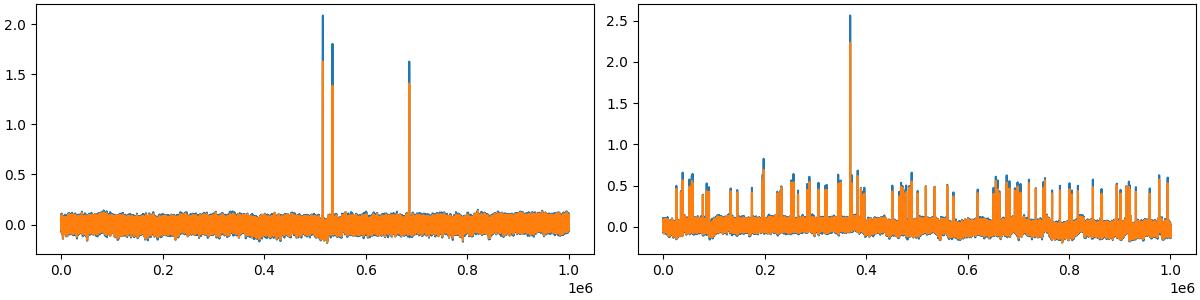

In [2]:
light_dir = "./README Example Data/LT192Chip1_BF_20220235/1KIDs laser on 1545 50nW 46dB/TD_Power"  
dark_dir = './README Example Data/LT192Chip1_BF_20220235/1KIDs laser off/TD_Power'
kid_nr = 1      
pread = 102 
tqp = 4
pw = 1000
nr_files = 1
type = 'vis'

dark_files, _ = f.get_bin_files(dark_dir, kid_nr, pread, type=type)
dark_amp, dark_theta, _ = f.concat_vis(dark_files[:nr_files])
_, dark_X = f.smith_coord(dark_theta, dark_amp)

light_files, info_path = f.get_bin_files(light_dir, kid_nr, pread, type=type)
light_amp, light_theta, _ = f.concat_vis(light_files[:nr_files])
_, light_X = f.smith_coord(light_theta, dark_amp)

info = f.get_info(info_path[0])
sf = info['fs']
dt = int(1 / sf * 1e6)
sw = int(tqp / dt)

fig, ax = plt.subplot_mosaic('ab', constrained_layout=True, figsize=(12, 3))
ax['a'].plot(dark_X)
ax['b'].plot(light_X)

if tqp and sw > 3:
    filter = f.get_window('box', sw)
    light_X_smooth = convolve(light_X, filter, mode='valid')
    dark_X_smooth = convolve(dark_X, filter, mode='valid')
    ax['a'].plot(dark_X_smooth)
    ax['b'].plot(light_X_smooth)
